# R Plotting Tips

---

## General Notes

### General Parameters

most of the time, it helps to override the default title and axis labels using the `main`, `xlab`, and `ylab` parameters. These are set on the function that starts off your plot.

Especially when creating multiple plots for comparison, or layering multiple plots into one, it's important to set the x and y scales (the value range of each axis). By default R will match the scale to the data, will lead to mis-matched scales and incompatible visuals. Use `xlim` and `ylim` paramters to set the scale. These take a vector such as `c(0, 100)`.

The `legend()` function will draw a legend into your plot to show a color reference. As always there are [a lot of options](http://www.sthda.com/english/wiki/add-legends-to-plots-in-r-software-the-easiest-way).

### Graphics Parameters

Most of the parameters that are passed to plotting functions (such as `col` for color) are passed behnid the scenes to R's `par()` function which sets the current graphs params. Generally this means that when looking up documentation for graphics, you can find what you need in discussions of `par()` rather than the plotting function you're using.

The [`par()` docs](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) are mostly helpful for seeing what options exist and as a source for search terms to find information elsewhere. [Quick-R](https://www.statmethods.net/advgraphs/parameters.html) has a reasonable guide to the most used parameters.

Parameters I use most:

- `col`: color
- `border`: border/line color
- `lwd`: line thickness
- `pch`: mark type (dot, circle, etc.) [tips for pch](https://www.datanovia.com/en/blog/pch-in-r-best-tips/)
- `cex`: mark scaling
- `mfrow`: groups multiple plots in a grid, takes a vector (rows, columns): `c(1,3)`

### Color

R does not support transparency using hex codes, so you need to use the `rgb()` function. This function uses values from 0-1 for each of r, g, b, and alpha values. Transparency goes a long way toward reducing the harshness of R's default styles and is essential for overlapping plots.

It's worth setting up your colors using variables in advance. I set up these colors by experimenting with the values manually, but a good way to select colors based on distribution across the color wheel is [Paletton](http://paletton.com/).

Accessible palettes for visualization are also available from the [Viridis Project](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)

It can help to set up your colors in advance and save them to variables:

In [1]:
red_fill    <- rgb(1, 0, 0, alpha=0.25)
blue_fill   <- rgb(0, 1, 1, alpha=0.25)
cyan_fill   <- rgb(0, 0.75, 1, alpha=0.25)
orange_fill <- rgb(1, 0.75, 0, alpha=0.25)
green_fill  <- rgb(0.35, 1, 0.35, alpha=0.25)
pink_fill  <- rgb(1, 0, 0.95, 0.5)
red_line <- "#990000"
blue_line <- "#009999"
cyan_line <- "#0066cc"
orange_line <- "#cc6600"
green_line <- "#33cc33"

### Layering Plots

Many of the plotting functions in R include an `add` parameter that determines if your function draws into the current plot or starts a new one. To overlay multiple graphics into a plot set `add=TRUE`.

### Saving Plots

There are [several](https://www.rdocumentation.org/packages/grDevices/versions/3.4.1/topics/png) functions for saving plots to an image file, named after the file type. Generally, I save files to PNG with a transparent background: `png("filename.png", bg="transparent", width=400, height=400)`

---

## Project Data

Load the results CSV

In [2]:
df <- read.csv('sample-data.csv')

Create a new column in `df` from the means of the credibility columns

In [3]:
df$credibility <- rowMeans(data.frame(df$recommend, df$knowledgeable, df$trustworthy))

Create groups by filtering on columns.

The comma in the filter expression is needed to indicate to R that you're filtering on a list of columns, even though your list only contains one.

In [4]:
# font groups
a <- df[df$font_sample == 'A',]
b <- df[df$font_sample == 'B',]

# source groups
m <- df[ df$source == 'M',]
o <- df[ df$source == 'O',]

## Histograms & Density Curve Plots

Histograms and density plots display a count within defined buckets or bins. if counting the number of occurences, this is "frequency"; when normalizing the frequency as a portion of the whole, this is "density." The `hist` function defaults to frequenct, but will display density is `prob=TRUE`.

When creating histograms, the `breaks` parameter is key. This can be an integer, an integer vector, or a sequence. If `breaks` is an integer, R will attempt to create bins using that number of divisions... but it doesn't try too hard. This will never guarantee the exact number of bins you want. Better to provide a vector with the exact divisions you want (values are where bins _start_). `c(0,18,25,30,40,65)` will create bins that start at 0,18,25,30, 40, and 65 (usefule for age bins). To create a large number of evenly sized bins, use `seq.int()`. This takes 2-3 parameters, the start of the range, the end of the range, and (optionall) the interval. `seq.int(0,100,20)` will create a sequence from 0 to 100 in steps of 20.

The two sets of plots below show the distribution of the credibility results from the sample data. The first set uses the default `ylim` value, and the second uses the same `ylim` value for each histogram, to show the importance of using this parameter when plotting for comparison.

In [5]:
# options() are Jupyter specific, this sets the plot width to 3x the default
# This is so the mfrow parameter doesn't shrink the plots into the usual width
options(repr.plot.width=12, repr.plot.height=4)

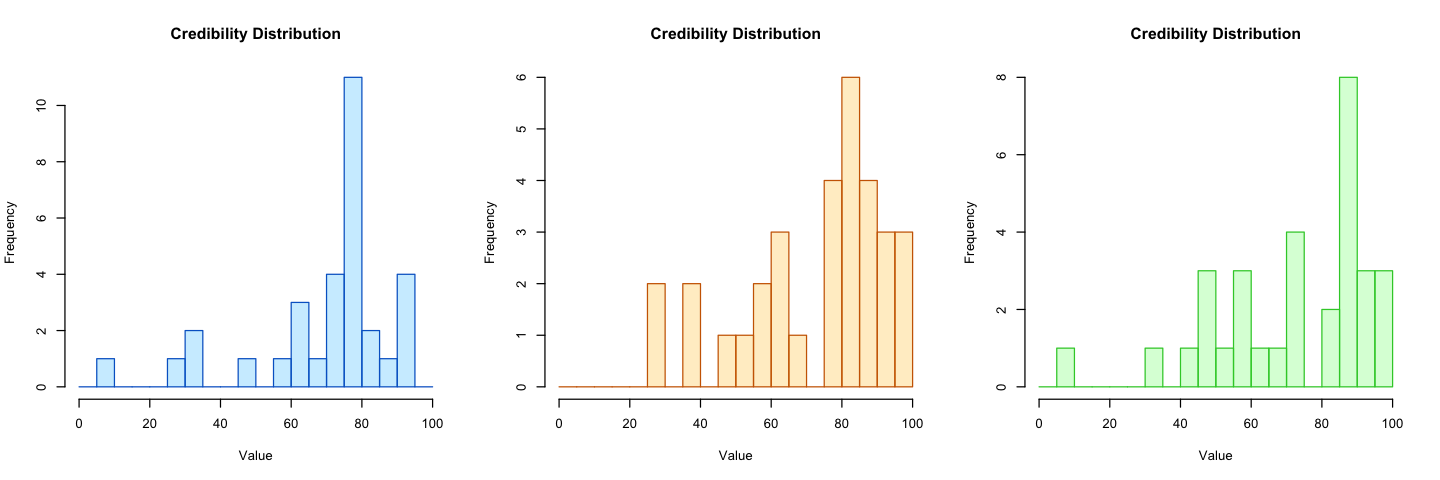

In [6]:
par(mfrow=c(1,3))
hist(df$recommend, breaks=seq.int(0,100,5), col=cyan_fill, border=cyan_line, main="Credibility Distribution", xlab="Value")
hist(df$knowledgeable, breaks=seq.int(0,100,5), col=orange_fill, border=orange_line, main="Credibility Distribution", xlab="Value")
hist(df$trustworthy, breaks=seq.int(0,100,5), col=green_fill, border=green_line, main="Credibility Distribution", xlab="Value")

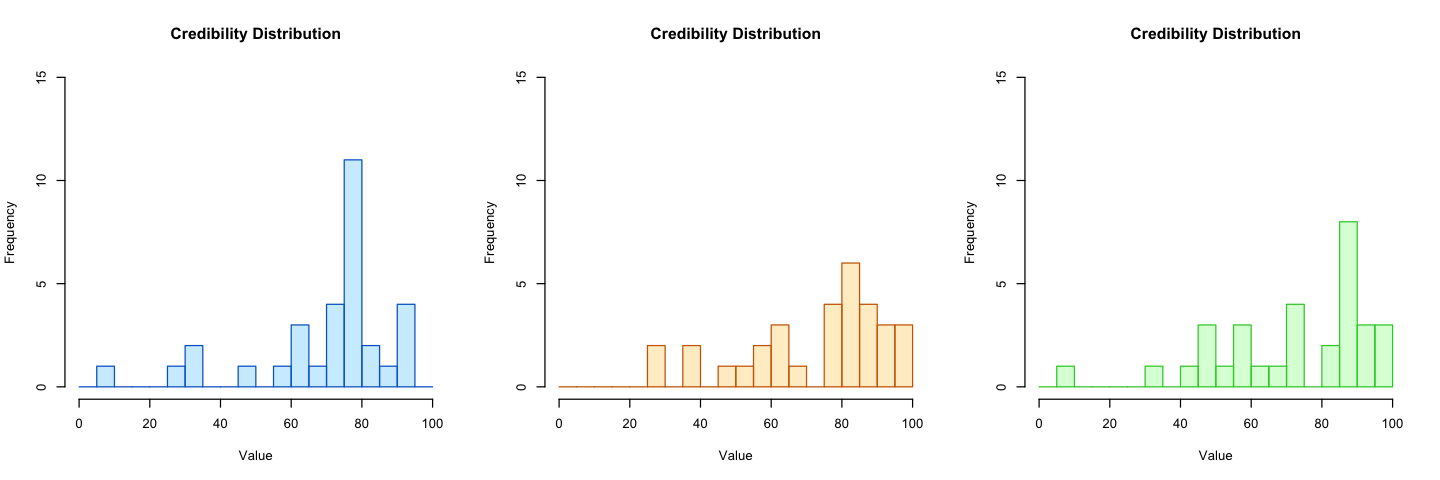

In [7]:
par(mfrow=c(1,3))
hist(df$recommend, breaks=seq.int(0,100,5), col=cyan_fill, border=cyan_line, ylim=c(0,15), main="Credibility Distribution", xlab="Value")
hist(df$knowledgeable, breaks=seq.int(0,100,5), col=orange_fill, border=orange_line, ylim=c(0,15), main="Credibility Distribution", xlab="Value")
hist(df$trustworthy, breaks=seq.int(0,100,5), col=green_fill, border=green_line, ylim=c(0,15), main="Credibility Distribution", xlab="Value")

In [8]:
# options() are Jupyter specific, this sets the plot width back to the default
options(repr.plot.width=7, repr.plot.height=7)

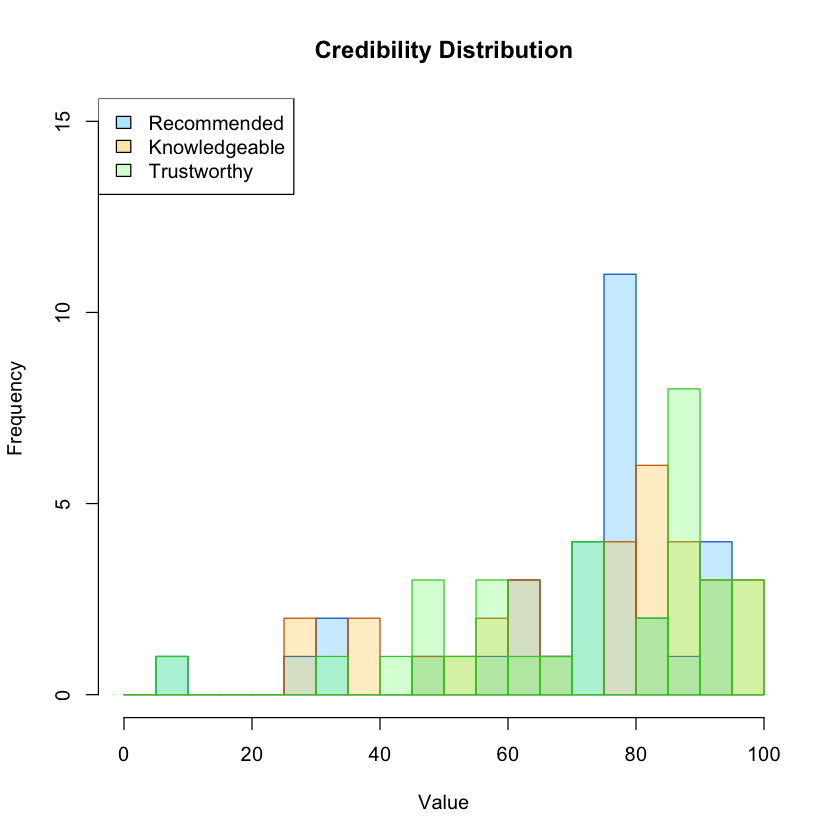

In [9]:
hist(df$recommend, breaks=seq.int(0,100,5), col=cyan_fill, border=cyan_line, ylim=c(0,15), main="Credibility Distribution", xlab="Value")
hist(df$knowledgeable, breaks=seq.int(0,100,5), col=orange_fill, border=orange_line, ylim=c(0,15), add=TRUE)
hist(df$trustworthy, breaks=seq.int(0,100,5), col=green_fill, border=green_line, ylim=c(0,15), add=TRUE)

legend("topleft", c("Recommended","Knowledgeable","Trustworthy"), fill=c(rgb(0, 0.75, 1, alpha=0.35), rgb(1, 0.75, 0, alpha=0.35), rgb(0.35, 1, 0.35, alpha=0.25)))

Histograms do not read well when layered (see above). Instead, use a **density plot**.

These are the steps to create a filled density plot:

1. Convert your vector of values into a density vector using `density()`
2. Create an empty plot, using this to set the `xlim`, `ylim`, and other plot-wide parameters.
3. Draw a filled polygon into this plot using the densities calculated before.


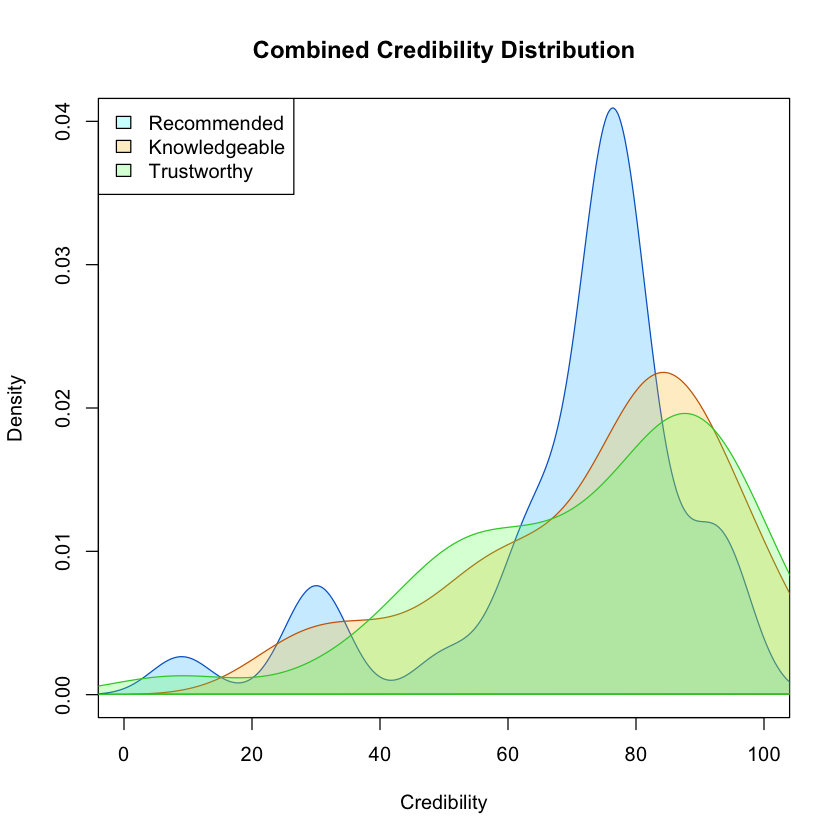

In [10]:
r <- density(df$recommend)
k <- density(df$knowledgeable)
t <- density(df$trustworthy)

plot(c(), c(), ylim=c(0, 0.04), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Combined Credibility Distribution")
polygon(r, col=cyan_fill, border=cyan_line, lwd=1)
polygon(k, col=orange_fill, border=orange_line, lwd=1)
polygon(t, col=green_fill, border=green_line, lwd=1)


legend("topleft", c("Recommended","Knowledgeable","Trustworthy"), fill=c(blue_fill, orange_fill, green_fill))

### Font Comparisons (Density Curves)

If you are making several similar plots in succession, consider writing a function to reduce the boilerplate needed:

In [11]:
chart_your_density <- function(title, a, b, x, y) {
    ad <- density(a)
    bd <- density(b)
    plot(c(), c(), xlim=x, ylim=y, xlab="Score", ylab="Density", main=title)
    polygon(ad, col=red_fill, border=red_line, lwd=1)
    polygon(bd, col=blue_fill, border=blue_line, lwd=1)
    legend("topleft", c("Merriweather","Easy Reading"), fill=c(red_fill, blue_fill))
}

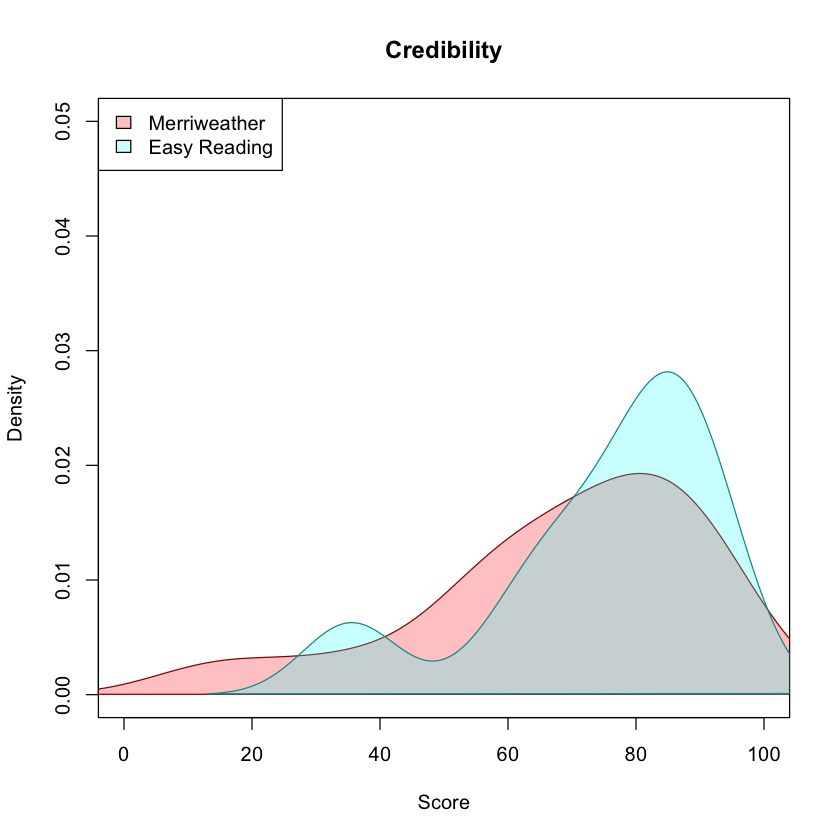

In [12]:
chart_your_density(
    "Credibility",
    a$credibility,
    b$credibility,
    c(0,100),
    c(0,0.05)
)

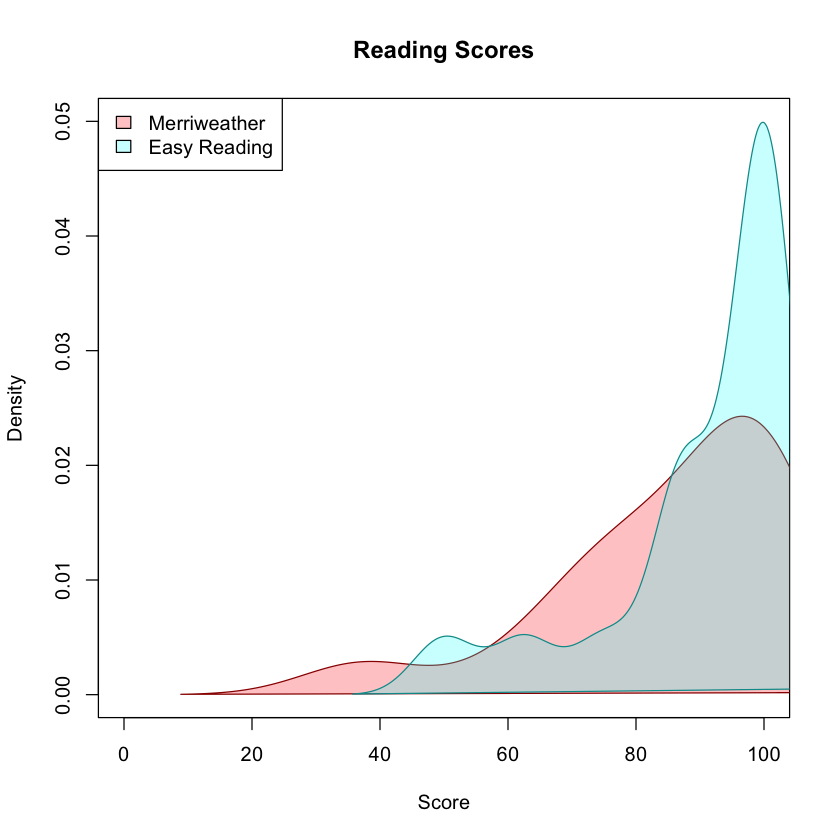

In [13]:
chart_your_density(
    "Reading Scores",
    a$reading_score,
    b$reading_score, 
    c(0, 100), 
    c(0, 0.05)
)

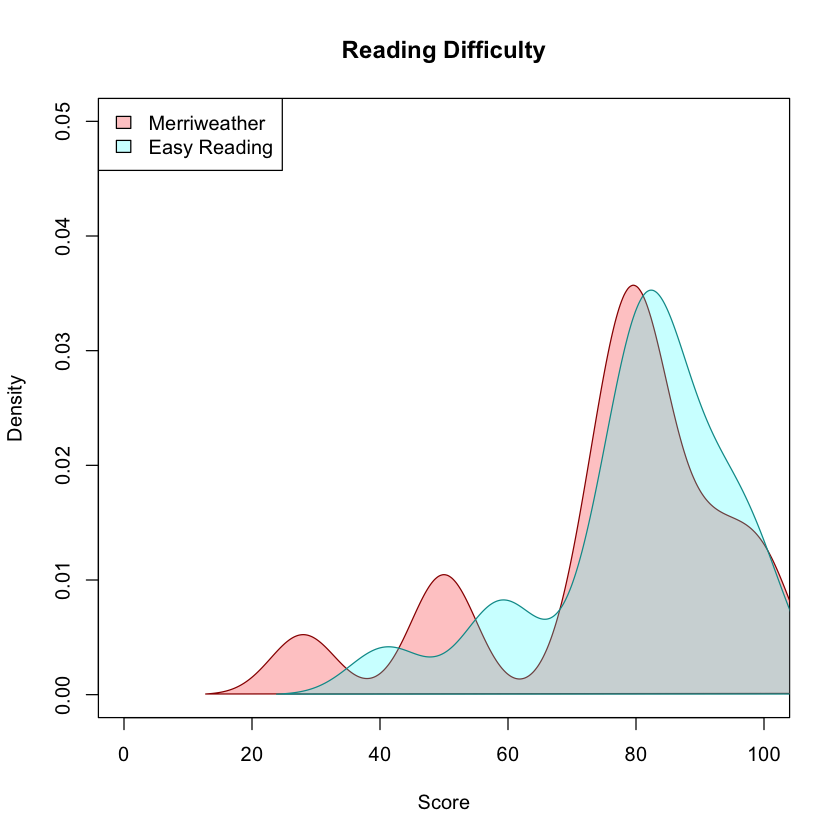

In [14]:
chart_your_density(
    "Reading Difficulty",
    a$reading_difficulty,
    b$reading_difficulty, 
    c(0, 100), 
    c(0, 0.05)
)

### Credibility (Correlation Plot)

The `corrplot` library has a lot of funcationality for visualizing correlations. This package has some issues with the support for backgrounds, for example, and the output is not as crisp as with the default functions. Customizing the labels is done via the `colnames` and `rownames` functions.

STHDA has a [guide](http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram).

In [27]:
library(corrplot)

Steps for creating a correlation plot:

1. Create a new dataframe with only the columns you wish to plot
2. Convert this to a correlation matrix via `cor()`
3. Override the default labels for readability
4. Run the plot

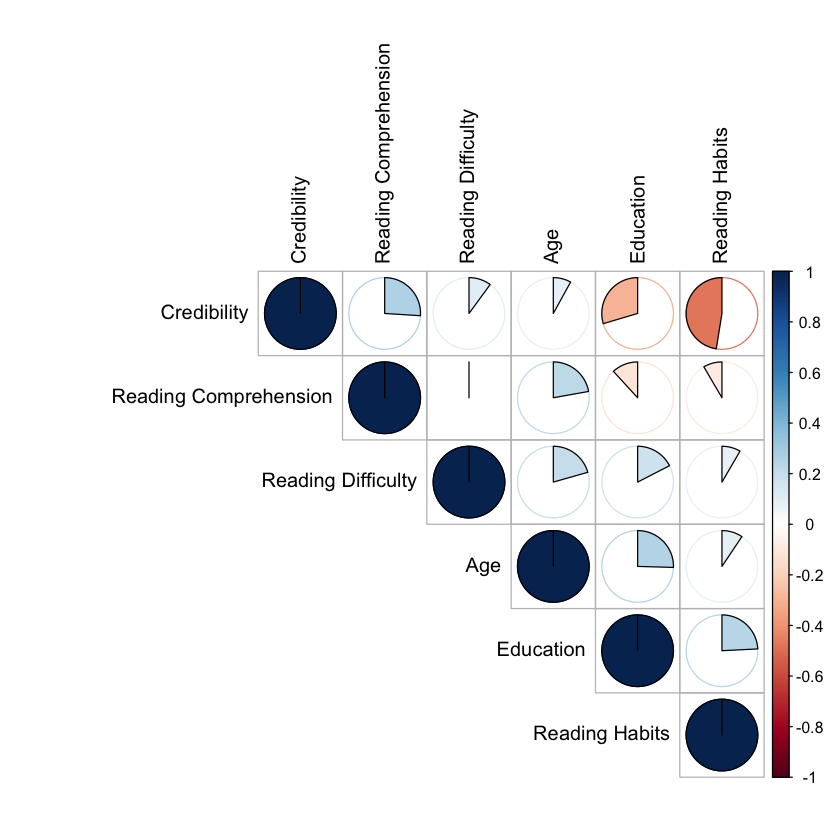

In [16]:
mvs <- data.frame(df$credibility, df$reading_difficulty, df$reading_score, df$age, df$education, df$reading_habits)
mvs_cor <- cor(mvs)
labels <- c("Credibility", "Reading Comprehension", "Reading Difficulty", "Age", "Education", "Reading Habits")
colnames(mvs_cor) <- labels
rownames(mvs_cor) <- labels
corrplot(mvs_cor, type="upper", tl.col="black", method="pie")

### Sample Comparisons (Density Plots)

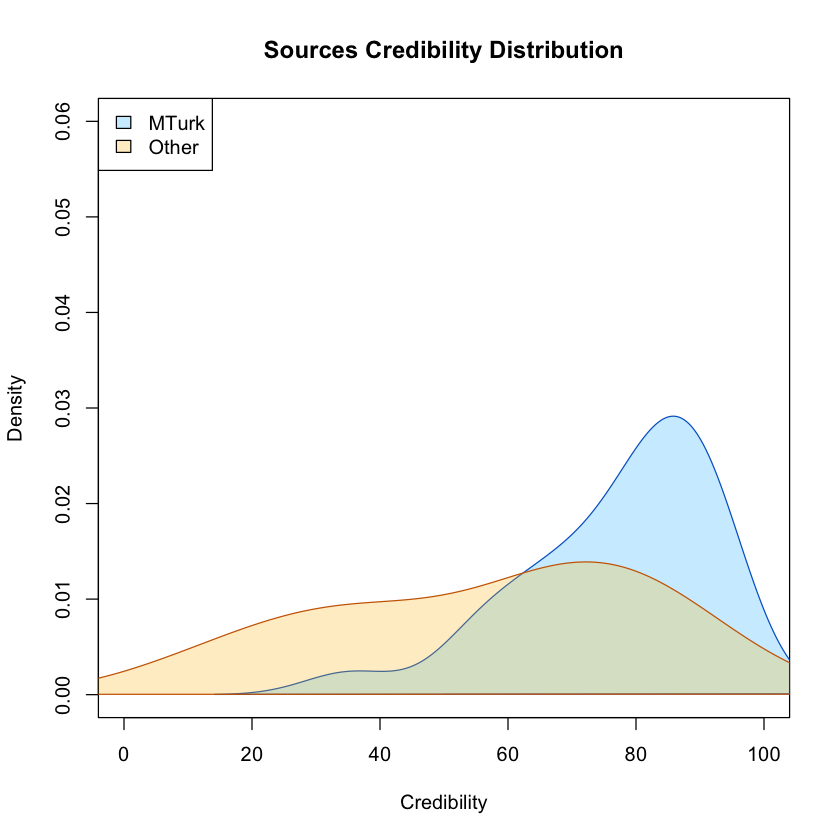

In [17]:
mc <- density(m$credibility)
oc <- density(o$credibility)

plot(c(), c(), ylim=c(0, 0.06), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Sources Credibility Distribution")
polygon(mc, col=cyan_fill, border=cyan_line, lwd=1)
polygon(oc, col=orange_fill, border=orange_line, lwd=1)

legend("topleft", c("MTurk","Other"), fill=c(cyan_fill, orange_fill))

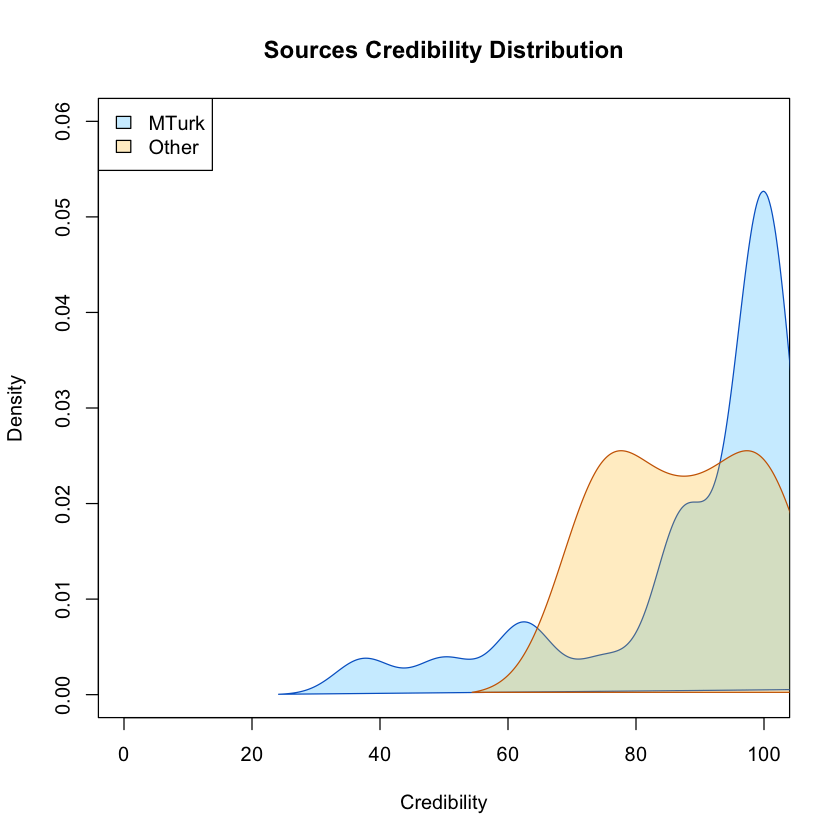

In [18]:
mc <- density(m$reading_score)
oc <- density(o$reading_score)

plot(c(), c(), ylim=c(0, 0.06), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Sources Credibility Distribution")
polygon(mc, col=cyan_fill, border=cyan_line, lwd=1)
polygon(oc, col=orange_fill, border=orange_line, lwd=1)

legend("topleft", c("MTurk","Other"), fill=c(cyan_fill, orange_fill))

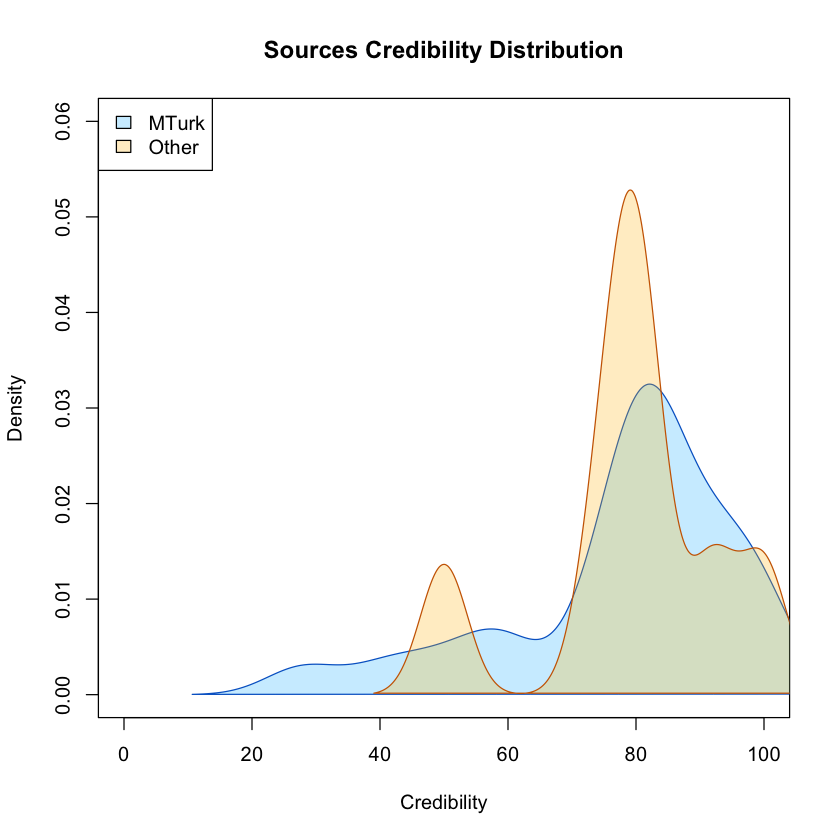

In [19]:
mc <- density(m$reading_difficulty)
oc <- density(o$reading_difficulty)

plot(c(), c(), ylim=c(0, 0.06), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Sources Credibility Distribution")
polygon(mc, col=cyan_fill, border=cyan_line, lwd=1)
polygon(oc, col=orange_fill, border=orange_line, lwd=1)

legend("topleft", c("MTurk","Other"), fill=c(cyan_fill, orange_fill))

### Credibility Dimensions Comparisons (Density Plots)

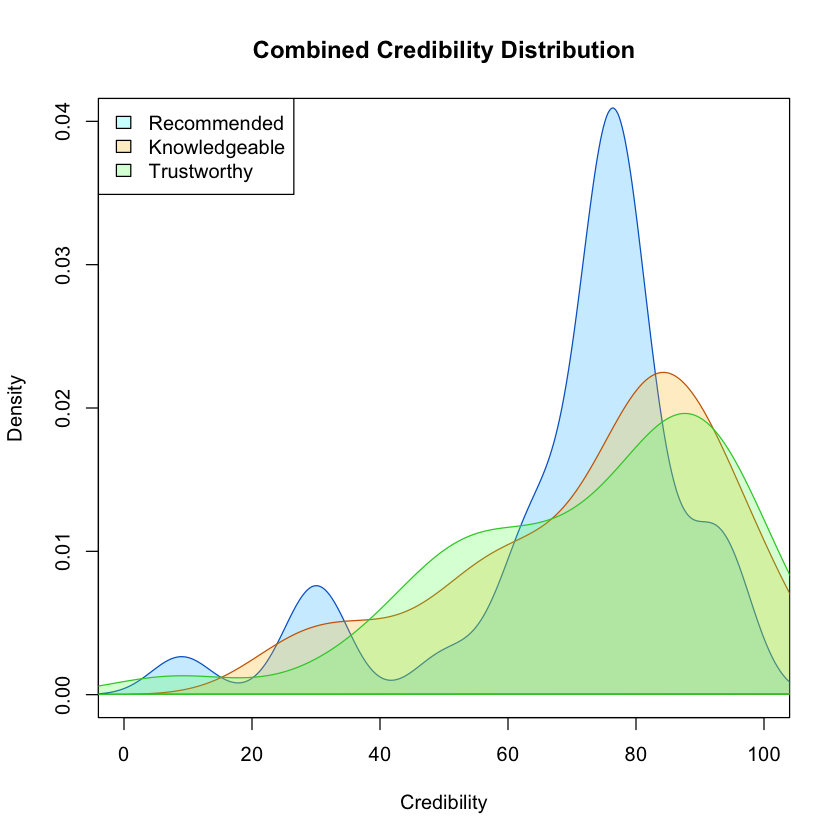

In [20]:
r <- density(df$recommend)
k <- density(df$knowledgeable)
t <- density(df$trustworthy)

plot(c(), c(), ylim=c(0, 0.04), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Combined Credibility Distribution")
polygon(r, col=cyan_fill, border=cyan_line, lwd=1)
polygon(k, col=orange_fill, border=orange_line, lwd=1)
polygon(t, col=green_fill, border=green_line, lwd=1)


legend("topleft", c("Recommended","Knowledgeable","Trustworthy"), fill=c(blue_fill, orange_fill, green_fill))

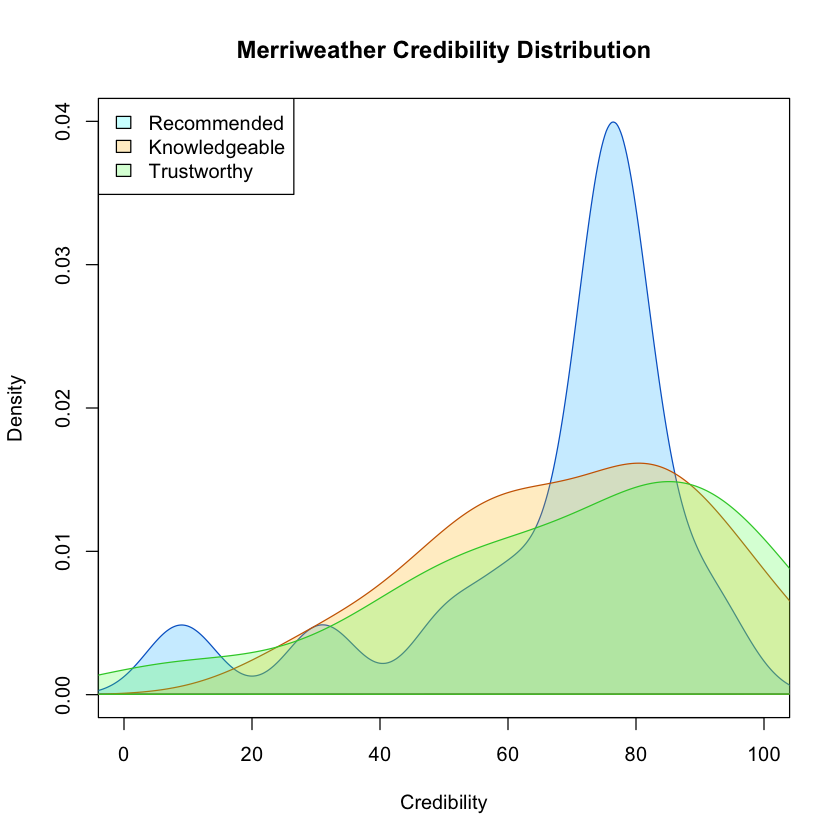

In [21]:
r <- density(a$recommend)
k <- density(a$knowledgeable)
t <- density(a$trustworthy)

plot(c(), c(), ylim=c(0, 0.04), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Merriweather Credibility Distribution")

polygon(r, col=cyan_fill, border=cyan_line, lwd=1)
polygon(k, col=orange_fill, border=orange_line, lwd=1)
polygon(t, col=green_fill, border=green_line, lwd=1)


legend("topleft", c("Recommended","Knowledgeable","Trustworthy"), fill=c(blue_fill, orange_fill, green_fill))

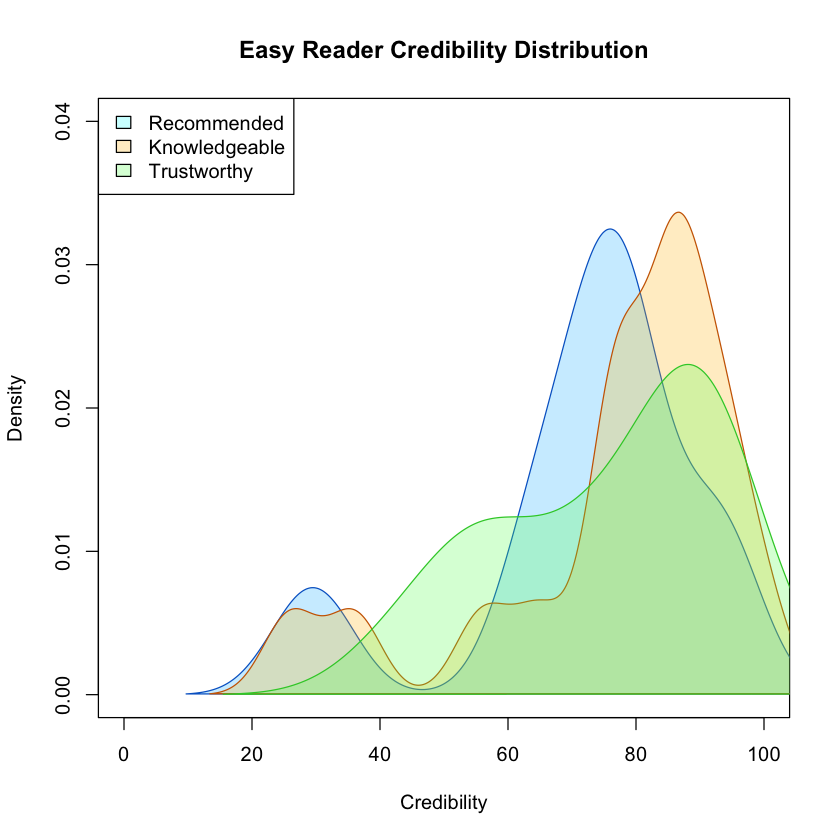

In [22]:
r <- density(b$recommend)
k <- density(b$knowledgeable)
t <- density(b$trustworthy)

plot(c(), c(), ylim=c(0, 0.04), xlim=c(0,100), xlab="Credibility", ylab="Density", main="Easy Reader Credibility Distribution")

polygon(r, col=cyan_fill, border=cyan_line, lwd=1)
polygon(k, col=orange_fill, border=orange_line, lwd=1)
polygon(t, col=green_fill, border=green_line, lwd=1)


legend("topleft", c("Recommended","Knowledgeable","Trustworthy"), fill=c(blue_fill, orange_fill, green_fill))

### Q-Q Plots for Normality

Q-Q plots can be used to check visually for normality. 

[Understanding Q-Q Plots](https://data.library.virginia.edu/understanding-q-q-plots/) has a good explanation.

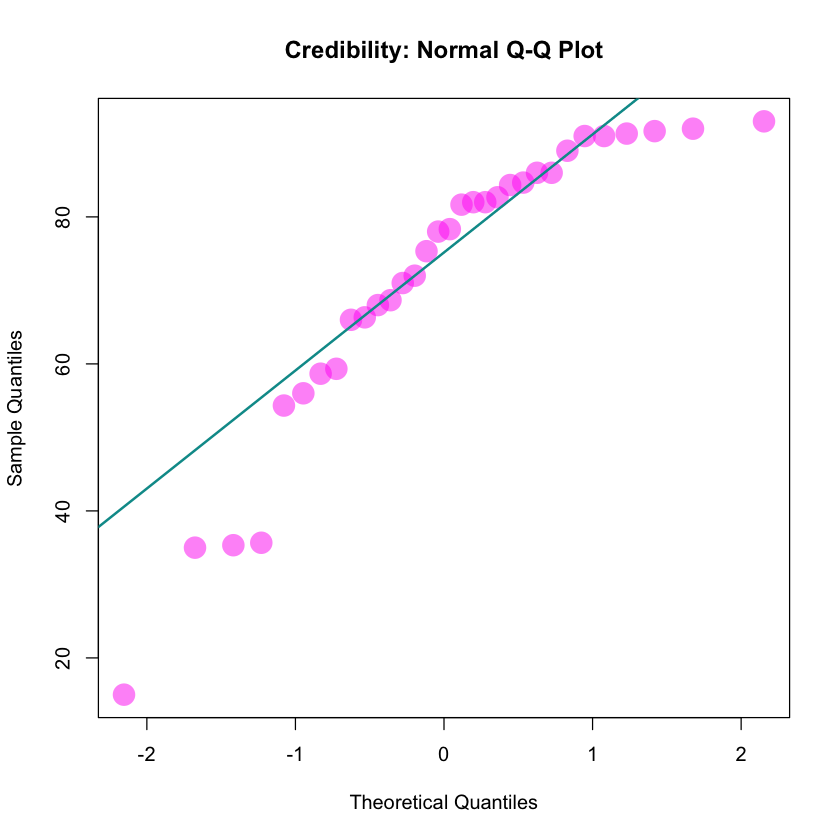

In [23]:
qqnorm(df$credibility, col=pink_fill, pch=16, cex=2.5, main="Credibility: Normal Q-Q Plot")
qqline(df$credibility, lwd=2, col=blue_line)

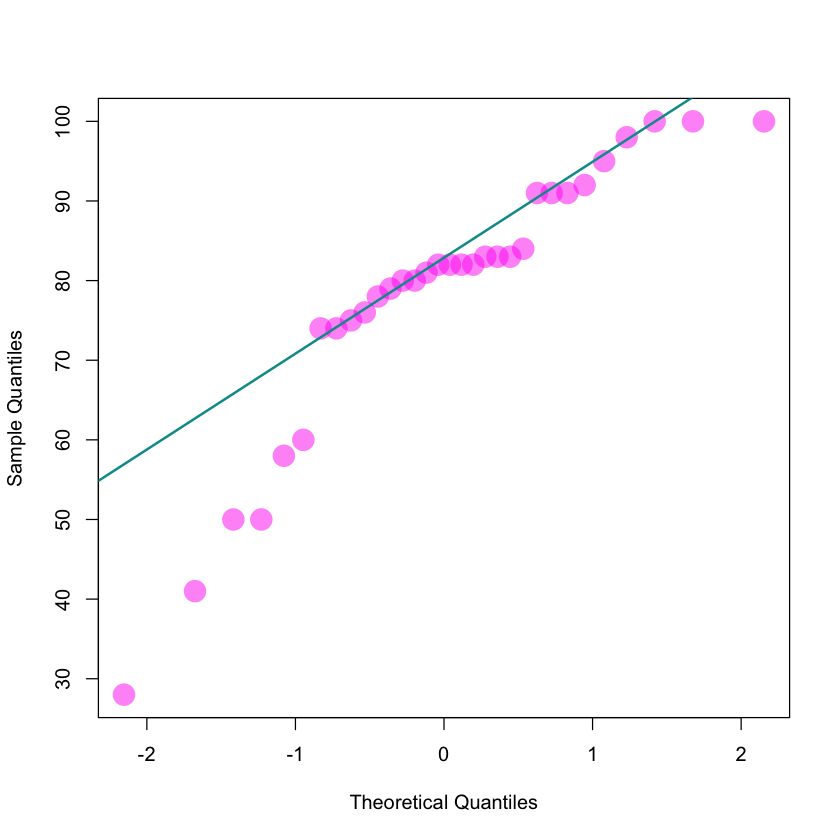

In [24]:
qqnorm(df$reading_difficulty, col=pink_fill, pch=16, cex=2.5, main="")
qqline(df$reading_difficulty, lwd=2, col=blue_line)

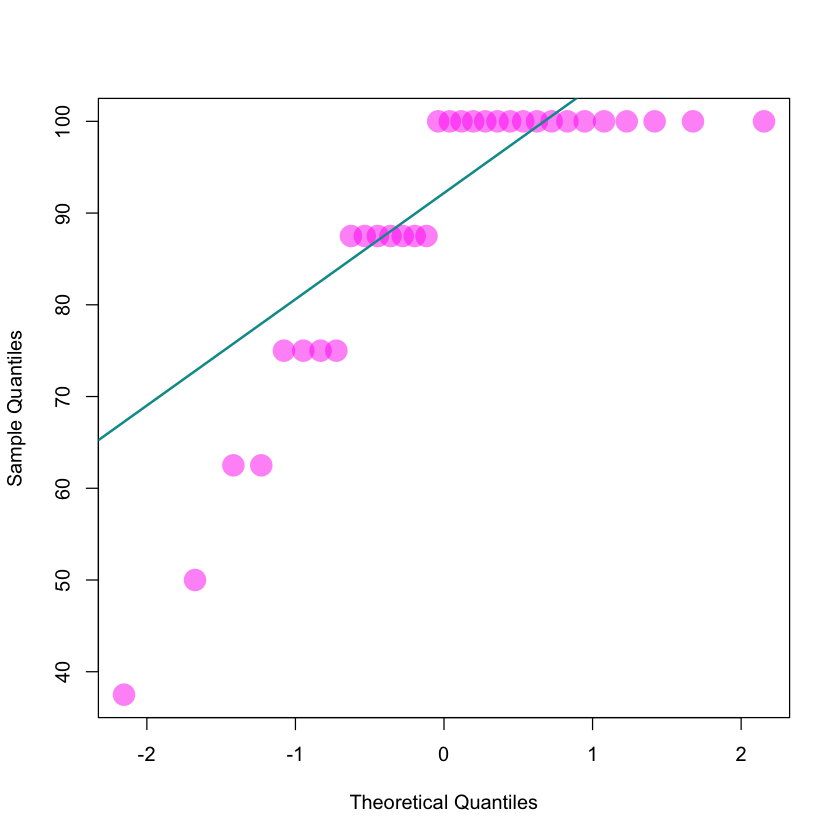

In [25]:
qqnorm(df$reading_score, col=pink_fill, pch=16, cex=2.5, main="")
qqline(df$reading_score, lwd=2, col=blue_line)

### Histogram with Normalized D-Curve

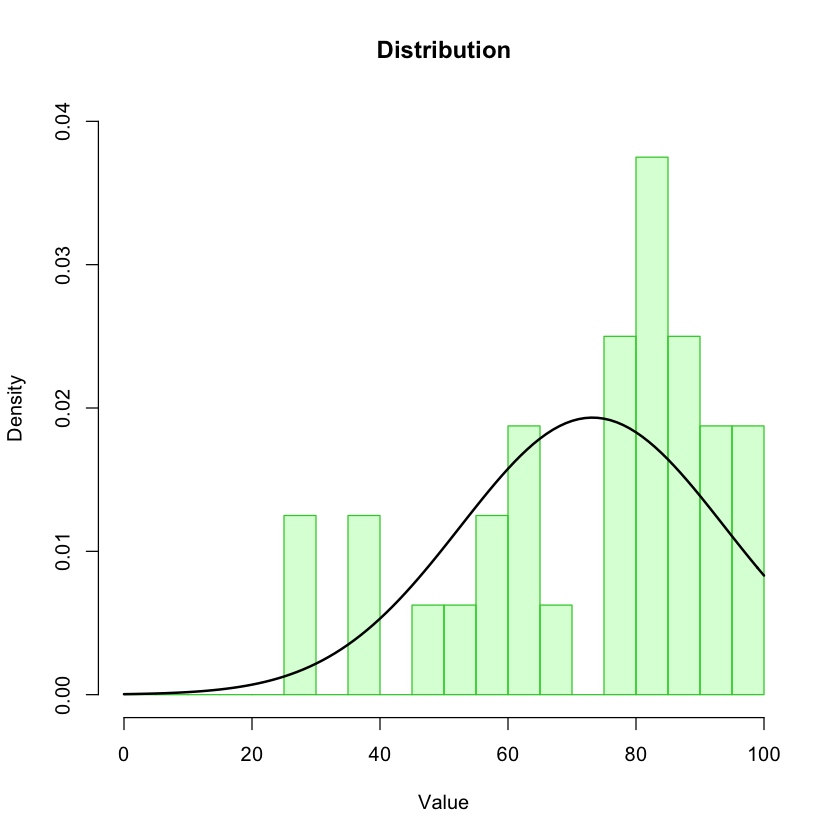

In [26]:
hist(df$knowledgeable, breaks=seq.int(0,100,5), col=green_fill, border=green_line, ylim=c(0,0.04), prob=TRUE, main="Distribution", xlab="Value")
curve(dnorm(x, mean=mean(df$knowledgeable), sd=sd(df$knowledgeable)), lwd=2, col="#000000", add=TRUE)